In [ ]:
"""
在一个二维数组中，每一行都按照从左到右递增的顺序排序，每一列都按照从上到下递增的顺序排序。请完成一个函数，输入这样的
一个二维数组和一个整数，判断数组中是否含有该整数。
思路：
1. 最简单的可以采用暴力解法，遍历整个二维数组判断
2. 查找方式从右上角开始查找，如果当前元素大于target, 左移一位继续查找（右上角为该行最大），如果当前元素小于target, 
下移一位继续查找（右上角为该列最小）
"""
import unittest
class Solution(object):
    def find(self, target, array):
        if not array or isinstance(array, list) is False or isinstance(target, int) is False:
            return False
        x = 0
        y = len(array[0]) - 1

        while x < len(array) and y >= 0:
            if array[x][y] == target:
                return True
            elif array[x][y] > target:
                y -= 1
            elif array[x][y] < target:
                x += 1
        return False

class Test(unittest.TestCase):
    @classmethod
    def setUpClass(cls):
        cls.s = Solution()
        cls.test = [[1, 2, 8, 9],
                    [2, 4, 9, 12],
                    [4, 7, 10, 13],
                    [6, 8, 11, 15]]

    # 测试数字在数组中
    def test_1(self):
        target = 7
        self.assertEqual(self.s.find(target, self.test), True)
    # 测试数据不在数组中
    def test_2(self):
        target1 = 5
        target2 = 20
        target3 = -1
        self.assertEquals((self.s.find(target1, self.test), False), (self.s.find(target2, self.test), False),
                          (self.s.find(target3, self.test), False))

    # 测试数据是数组中最小的数
    def test_3(self):
        target = 1
        self.assertEqual(self.s.find(target, self.test), True)

    # 测试数据是数组中最大的数
    def test_4(self):
        target = 15
        self.assertEqual(self.s.find(target, self.test), True)

    # 无效数据
    def test_5(self):
        target1 = 'a'
        target2 = 7
        array1 = []
        array2 = ''
        self.assertEquals((self.s.find(target1, array1), False), (self.s.find(target1, array2), False),
                          (self.s.find(target2, array1), False))
        self.assertEqual(self.s.find(target2, array2), False)

if __name__ == '__main__':
    unittest.main()  

In [ ]:
"""
斐波那契数列
直接使用生成器， 节省内存
"""
def fib(num):
    a, b =0,1
    for i in range(num):
        yield b
        a, b =b, a+b
if __name__ =='__main__':
    print([n for n in fib(10)])
    print(fib(10))

In [ ]:
"""
Given an array of integers, find two numbers such that they add up to a specific target number.

The function twoSum should return indices of the two numbers such that they add up to the target, 
where index1 must be less than index2. Please note that your returned answers (both index1 and index2)
are not zero-based.
You may assume that each input would have exactly one solution.

Input: numbers={2, 7, 11, 15}, target=9
Output: index1=1, index2=2
"""
class Solution:
    def twoSum(self, num, target):
        hash_map ={}
        for ind, val in enumerate(num):
            hash_map[val] =ind
        for ind1, val in enumerate(num):
            # default: (key,value) search in keys
            if target -val in hash_map:
                ind2 =hash_map[target- val]
                if ind1 != ind2:
                    return ind1+1, ind2+1
if __name__ =='__main__':
    print(Solution().twoSum([3,2,4], 10))

"""
There are two sorted arrays A and B of size m and n respectively. Find the median of the two sorted arrays. 
The overall run time complexity should be O(log (m+n)).
"""
class Solution:
    def findMedianSortedArrays(self, A, B):
        m =len(A)
        n =len(B)
        if ((m+n)&1 ==0):
            return (self.find_kth(A, B, (m+n)//2)+self.find_kth(A, B, (m+n)//2-1))/2.0
        else:
            return self.find_kth(A, B, (m+n)//2)
    def find_kth(self, A,B,k):
        if not A: return B[k]
        if not B: return A[k]
        if k==0: return min(A[0], B[0])

        m,n =len(A), len(B)
        if A[m//2] >= B[n//2]:
            if k> m//2 +n//2:
                return self.find_kth(A, B[n//2+1:], k-n//2-1)
            else:
                return self.find_kth(A[:m//2], B,k)            
        else:
            return self.find_kth(B,A,k)
if __name__ =="__main__":

    assert Solution().findMedianSortedArrays([1, 2], [1, 2, 3]) == 2
    assert Solution().findMedianSortedArrays([1, 2], [3]) == 2
    assert Solution().findMedianSortedArrays([1], [2, 3]) == 2
    assert Solution().findMedianSortedArrays([1, 2], [1, 2]) == 1.5


In [ ]:
"""
Given an array of integers, find two numbers such that they add up to a specific target number.

The function twoSum should return indices of the two numbers such that they add up to the target, where 
index1 must be less than index2. Please note that your returned answers (both index1 and index2) are 
not zero-based.
You may assume that each input would have exactly one solution.
Input: numbers={2, 7, 11, 15}, target=9
Output: index1=1, index2=2
"""
class Solution:
    def twoSum(self, num, target):
        hash_map ={}
        for ind, val in enumerate(num):
            hash_map[val] =ind
        for ind1, val in enumerate(num):
            if target-val in hash_map:
                ind2 =hash_map[target-val]
                if ind1 != ind2:
                    return ind1+1, ind2+1
if __name__=='__main__':
    print(Solution.twoSum([3,2,4], 6))      
        
"""
There are two sorted arrays A and B of size m and n respectively. Find the median of the two sorted arrays.
The overall run time complexity should be O(log (m+n)).
"""
class Solution:
    def find_median_sorted_arrays(self, A,B):
        '''        
        Algorithm: Find k-th element in 2 array

        A: A_left A[m/2] A_right
        B: B_left B[n/2] A_right
        if A[m/2]>B[n/2] and k>m/2+n/2, then disregard B_left and B[n/2]
        if A[m/2]>B[n/2] and k<=m/2+n/2, then disregard A_right and A[m/2]
        if A[m/2]<=B[n/2] and k>m/2+n/2, then disregard A_left and A[m/2]
        if A[m/2]<=B[n/2] and k<=m/2+n/2, then disregard B_right and B[n/2]

        whether to disregard A[m/2] or B[n/2] takes time to consider
        
        T(N) = T(3/4 N) + O(1), thus T(N) = O(lg N) where N = |A|+|B|
        O(log (m+n)), thus binary search.
        '''
        m =len(A)
        n =len(B)
        if ((m+n)&1 ==0):
            return (self.find_kth(A, B,(m+n)/2)+self.find_kth(A,B,(m+n)/2-1))/2.0
        else:
            return self.find_kth(A, B,(m+n)/2)
    def find_kth(self, A,B, k):
        if not A: return B[k]
        if not B: return A[k]
        if k==0: return min(A[0], B(0))
        m, n =len(A), len(B)
        # pay attention to consider the equal sign. Assigning equal sign is an art.
        if A[m/2] >=B[n/2]:
            if k>m/2 +n/2:
                return self.find_kth(A, B[n/2+1:], k-n/2-1)
            else:
                return self.find_kth(A[:m/2], B,k)
        else:
            return self.find_kth(B,A, k)
if __name__ =="__main__":
    assert Solution.find_median_sorted_arrays([1,2],[1,2,3])==2
    assert Solution.find_median_sorted_arrays([1,2], [3])==2
    assert Solution.find_median_sorted_arrays([1], [2,3]) ==2
    assert Solution.find_median_sorted_arrays([1,2], [1,2])==1.5
    
"""
Given a string, find the length of the longest substring without repeating characters. For example, 
the longest substring without repeating letters for "abcabcbb" is "abc", which the length is 3. 
For "bbbbb" the longest substring is "b", with the length of 1.
"""
class Solution:
    def length_of_longest_substring(self, s):
        visited_last_index =[-1 for _ in range(256)]
        longest =0
        start =0
        for ind, val in enumerate(s):
            if visited_last_index[ord(val)] ==-1:
                longest =max(longest, (ind)-start+1)
            else:
                longest =max(longest, (ind-1)-start+1)
                # unmark ,hard to understand
                for i in range(start, visited_last_index[ord(val)]):
                    visited_last_index[ord[s[i]]]= -1
                start =visited_last_index[ord(val)]+1
            visited_last_index[ord(val)] =ind
        return longest
    
    
"""
You are given two linked lists representing two non-negative numbers. The digits are stored in 
reverse order and each of their nodes contain a single digit. Add the two numbers and return 
it as a linked list.

Input: (2 -> 4 -> 3) + (5 -> 6 -> 4)
Output: 7 -> 0 -> 8
"""
class ListNode:
    def __init__(self, x):
        self.val =x
        self.next =None
    def __repr__(self):
        return repr(self.val)
class Solution:
    def add_two_numbers(self, l1,l2):
        result_head =ListNode(0)
        
        cur1 =l1
        cur2 =l2
        cur =result_head
        while cur1 or cur2:
            cur.val =cur.val +self.add_node(cur1, cur2)
            if cur.val <10:
                if cur1 and cur1.next or cur2 and cur2.next:
                    cur.next =ListNode(0)
            else:
                cur.val -= 10
                cur.next =ListNode(1)
            if cur1:
                cur1 =curl.next
            if cur2:
                cur2 =cur2.next
            cur =cur.next
        return result_head            
                
    def add_node(self, node1, node2):
        if not node1 and not node2:
            raise Exception('Two nodes are none')
        if not node1:
            return node2.val
        if not node2:
            return node1.val
        return node1.val +node2.val
if __name__ =="__main__":
    l1s =[ListNode(1)]
    l2s =[ListNode(9), ListNode(9)]
    for i in range(len(l1s)-1):
        l1s[i].next =l1s[i+1]
    for i in range(len(l2s)-1):
        l2s[i].next =l2s[i+1]
    Solution.add_two_numbers(l1s[0], l2s[0])

"""
Given a string S, find the longest palindromic substring in S. You may assume that the 
maximum length of S is 1000, and
there exists one unique longest palindromic substring.
"""
class Solution(object):
    def longest_palindrome(self, s):
        """
        Algorithm: dp, O(n^2)

        p[i,j] represents weather s[i:j] is palindrome. (incl. i-th while excl. j-th)
        For example S = "abccb"
                         01234
        p[0,1] = True, p[1,2] = True, etc. since single char is Palindrom
        p[0,2] = s[0]==s[1],
        p[0,3] = s[0]==s[2] && p[1,2]
        p[0,4] = s[0]==s[3] && p[1,3]
        p[0,5] = s[0]==s[4] && p[1,4]

        thus,
        p[i,j] = 1 if i+1==j
        p[i,j] = s[i]==s[j-1] if i+1==j-1 else
        p[i,j] = s[i]==s[j-1] && p[i+1, j-1]

        :param s: string
        :return: string
        """
        length =len(s)
        dp =[[False for _ in range(length+1)] for _ in range(length+1)]
        for i in range(length+1):
            dp[i][i] =True
        longest =[0,0]
        for j in range(length+1):
            for i in range(j-1, -1,-1):
                if i+1 ==j:
                    dp[i][j] =True
                else:
                    dp[i][j] =s[i]== s[j-1] and dp[i+1][j-1]
                if dp[i][j] ==True and longest[1] -longest[0] <j-i:
                    longest[0], longest[1] =i,j
        return s[longest[0]:longest[1]]
if __name__ =="__main__":
    assert Solution().longest_palindrome('dfaaabbbaaac') =='aaabbbaaa'

"""
The string "PAYPALISHIRING" is written in a zigzag pattern on a given number of rows like this: 
(you may want to display
this pattern in a fixed font for better legibility)

P   A   H   N
A P L S I I G
Y   I   R
And then read line by line: "PAHNAPLSIIGYIR"
Write the code that will take a string and make this conversion given a number of rows:

string convert(string text, int nRows);
convert("PAYPALISHIRING", 3) should return "PAHNAPLSIIGYIR".
"""
class Solution:
    def convert(self, s, rows):
        length =len(s)
        matrix =[[] for _ in range(rows)]
        i =0
        while i<length:
            try:
                for j in range(rows):
                    matrix[j].append(s[i])
                    i+=1
                for j in range(rows-2, 0, -1):
                    matrix[j].append(s[i])
                    i += 1
            except IndexError:
                break
        lst =["".join(element) for element in matrix]
        return "".join(lst)
if __name__ =="__main__":
    assert Solution().convert('ABCD', 2) =='ACBD'

"""
Reverse digits of an integer.

Example1: x = 123, return 321
Example2: x = -123, return -321
"""
class Solution(object):
    def reverse(self, x):
        sign =-1 if x<0 else 1
        x *= sign
        # eliminated leading zero in the reversed integer
        count0 =0
        while x:
            if x%10 ==0:
                x //=10
                count0 +=1
            else:
                break
        x =str(x)
        lst =list(x) # list('123') returns ['1', '2', '3']
        lst.reverse()
        x ="".join(lst)
        x =int(x)
        return sign*x
    
if __name__ =="__main__":
    print(Solution().reverse(1230))
        
"""
Implement atoi to convert a string to an integer.

Hint: Carefully consider all possible input cases. If you want a challenge, please do not see below 
and ask yourself what are the possible input cases.
Notes: It is intended for this problem to be specified vaguely (ie, no given input specs). You are 
responsible to gather
all the input requirements up front.
"""

class Solution:
    def atoi(self, str1):
        INT_MAX =2147483647
        INT_MIN =- INT_MAX
        str1 =str1.strip()
        if not str1:
            return 0
        sign =1
        if str1[0] in ('+', '-'):
            if str1[0] =='-':
                sign =-1
            str1 =str1[1:]
        #check for leading digit
        if not str1[0].isdigit():
            return 0
        # find the 1st non-digit
        for ind, val in enumerate(str1):
            if not val.isdigit():
                str1 =str1[:ind]
                break
        # convert char array to integer
        sum1 =0
        scale =1
        for element in str1[::-1]:
            sum1 += scale *int(element)
            scale *=10
            
        result =sign * sum1
        if result >INT_MAX:
            return INT_MAX
        if result < INT_MIN:
            return INT_MIN
        return result
        
"""
Determine whether an integer is a palindrome. Do this without extra space.

msb: Most Significant Bit 高有效位
lsb 
"""
class Solution(object):
    def is_palindrome(self, x):
        if x<0:
            return False
        div =1
        while x//div >=10:
            div *= 10
        while x >0:
            msb =x /div
            lsb =x%10
            
            if msb != lsb:
                return False
            x %= div
            x /=10
            div /=100
        return True
if __name__ =="__main__":
    print(Solution().is_palindrome(2147483647))

"""
Given n non-negative integers a1, a2, ..., an, where each represents a point at coordinate (i, ai). 
n vertical lines are drawn such that the two endpoints of line i is at (i, ai) and (i, 0). Find two lines, 
which together with x-axis forms a
container, such that the container contains the most water.

Note: You may not slant the container.
the idea is so simple

"""
class Solution:
    def max_area(self, height):
        start =0
        end =len(height)-1
        
        max_area =-1 <<32
        while start <end:
            area =min(height[start], height[end])*(end-start)
            max_area =max(area, max_area)
            
            if height[start] <height[end]:
                start +=1
            else:
                end -=1
        return max_area
    
"""
'.' Matches any single character.
'*' Matches zero or more of the preceding element.

The matching should cover the entire input string (not partial).

The function prototype should be:
bool isMatch(const char *s, const char *p)

Some examples:
isMatch("aa","a") -> false
isMatch("aa","aa") -> true
isMatch("aaa","aa") -> false
isMatch("aa", "a*") -> true
isMatch("aa", ".*") -> true
isMatch("ab", ".*") -> true
isMatch("aab", "c*a*b") -> true

如果“*”不好判断，那我大不了就来个暴力的算法，把“”的所有可能性都测试一遍看是否有满足的，用两个指针i,j来表明当前s和p的字符。
我们采用从后往前匹配，为什么这么匹配，因为如果我们从前往后匹配，每个字符我们都得判断是否后面跟着“”，而且还要考虑越界的问题.
但是从后往前没这个问题，一旦遇到“*”，前面必然有个字符。
如果j遇到"*"，我们判断s[i] 和 p[j-1]是否相同，
如果相同我们可以先尝试匹配掉s的这个字符，i--，然后看之后能不能满足条件，满足条件，太棒了！我们就结束了，如果中间出现了一个
不满足的情况，马上回溯到不匹配这个字符的状态。
不管相同不相同，都不匹配s的这个字符，j-=2 (跳过“*”前面的字符)
if(p[j-1] == '.' || p[j-1] == s[i])
if(myMatch(s,i-1,p,j))
  return true;
return myMatch(s,i,p,j-2);
如果j遇到的不是“*”，那么我们就直接看s[i]和p[j]是否相等，不相等就说明错了，返回。
    if(p[j] == '.' || p[j] == s[i])
         return myMatch(s,i-1,p,j-1);
    else return false;
再考虑退出的情况
如果j已经<0了说明p已经匹配完了，这时候，如果s匹配完了，说明正确，如果s没匹配完，说明错误。
如果i已经<0了说明s已经匹配完，这时候，s可以没匹配完，只要它还有"*"存在，我们继续执行代码。
"""
class Solution:
    def is_match(self, s,p):
        #rename
        tape =s
        regex =p
        m =len(tape)
        n =len(regex)
        
        dp = [ [False for _ in range(n+1)]for _ in range(m+1)]
        # edge cases
        dp[m][n] =True
        for j in range(n-1, -1, -1):
            if regex[j] =='*':
                dp[m][j] = dp[m][j+1]
            elif j+1<n and regex[j+1] =='*':
                dp[m][j]= dp[m][j+1]
            else:
                dp[m][j] =False
        # normal cases
        for i in range(m-1, -1, -1):
            for j in range(n-1, -1, -1):
                #skip
                if regex[j] =='*':
                    if j-1 >=0 and regex[j-1] !='*':
                        dp[i][j] =dp[i][j+1]
                    else:
                        return False
                elif j+1 <n and regex[j+1] =="*":
                    if tape[i] ==regex[j] or regex[j] =='.':
                        dp[i][j] =dp[i][j+2] or dp[i+1][j] or dp[i+1][j+2]
                    else:
                        dp[i][j]= dp[i][j+2]
                else:
                    if tape[i]==regex[j] or regex[j] =='.':
                        dp[i][j] =dp[i+1][j+1]
                    else:
                        dp[i][j] =False
        # notice that in edge cases and normal cases, checking conditions are exactly the same
        return dp[0][0]
if __name__ =="__main__":
    assert Solution().is_match("aa", "a") == False
    assert Solution().is_match("aa", "aa") == True
    assert Solution().is_match("aaa", "aa") == False
    assert Solution().is_match("aa", "a*") == True
    assert Solution().is_match("ab", ".*") == True
    assert Solution().is_match("aab", "c*a*b") == True
    assert Solution().is_match("aaa", "a*a") == True
    assert Solution().is_match("bbbba", ".*a*a") == True
    assert Solution().is_match("a", "aa*") == True
        
"""
Given an integer, convert it to a roman numeral.

Input is guaranteed to be within the range from 1 to 3999.
"""

int2roman= {
    1: "I",
    4: "IV",
    5: "V",
    9: "IX",

    10: "X",
    40: "XL",
    50: "L",
    90: "XC",

    100: "C",
    400: "CD",
    500: "D",
    900: "CM",

    1000: "M"
}
class Solution:
    def int_to_roman(self, num):
        result =[]
        components = [1, 4, 5, 9, 10, 10, 40, 50, 90, 100, 400, 500, 900, 1000]
        #start from the largest
        for component in reversed(components):
            while num >=component:
                result.append(int2roman[component])
                num -= component
        return ''.join(result)
if __name__ =="__main__":
    assert Solution().int_to_roman(1666)== "MDCLXVI"
"""
Given a roman numeral, convert it to an integer.

Input is guaranteed to be within the range from 1 to 3999.
相同的数字连写，所表示的数等于这些数字相加得到的数，如 Ⅲ=3；小的数字在大的数字的右边，
所表示的数等于这些数字相加得到的数，如 Ⅷ=8、Ⅻ=12；小的数字（限于 Ⅰ、X 和 C）在大的数字的左边，
所表示的数等于大数减小数得到的数，如 Ⅳ=4、Ⅸ=9；在一个数的上面画一条横线，表示这个数增值 1,000 倍。
"""
roman2int= {
    'I':1,
    'IV':4,
    'V':5,
    'IX':9,
    
    'X': 10,
    'XL': 40,
    'XC':90,
    
    
    'L': 50,
    'C': 100,
    'CD':400,
    'D': 500,
    'CM':900,
    'M': 1000
}
class Solution:
    def roman_to_int(self, s):
        result =0
        for ind, val in enumerate(s):
            if ind>0 and roman2int[val] >roman2int[s[ind-1]]:
                result -= roman2int[s[ind-1]]
                result += roman2int[val] -roman2int[s[ind-1]]
            else:
                result += roman2int[val]
        return result
if __name__ =="__main__":
    assert Solution().roman_to_int('MDCLXVI') ==1666
"""
Given an array S of n integers, are there elements a, b, c in S such that a + b + c = 0?
Find all unique triplets in the
array which gives the sum of zero.

Note:
Elements in a triplet (a,b,c) must be in non-descending order. (ie, a <= b <= c)
The solution set must not contain duplicate triplets.
    For example, given array S = {-1 0 1 2 -1 -4},

    A solution set is:
    (-1, 0, 1)
    (-1, -1, 2)
"""
class Solution:
    def three_sum(self, nums):
        result =[]
        nums.sort()
        for i in range(len(nums)-1):
            left = i+1
            right =len(nums) -1
            while left <right:
                val =nums[i] + nums[left] +nums[right]
                if val == 0 and [nums[i], nums[left], nums[right]] not in result:
                    result.append([nums[i], nums[left], nums[right]])
                    left +=1
                    right -= 1
                elif val <0:
                    left += 1
                else:
                    right -= 1
        return result
if __name__ =='__main__':
    print(Solution().three_sum([-1,0,1,2,-1,-4]))        


In [ ]:
"""
Write a function to find the longest common prefix string amongst an array of strings.
"""
class Solution(object):
    def longest_common_prefix(self, strs):
        if not strs: return ""
        l = min(map(len, strs))
        i =0
        while i<l:
            char =strs[0][i]
            for s in strs:
                if s[i] != char:
                    return strs[0][:i]
            i += 1
        return strs[0][:i]
    
if __name__ =="__main__":
    strs =['abc', 'abce']
    print (Solution().longest_common_prefix(strs))

"""
Given an array S of n integers, find three integers in S such that the sum is closest to a given number,
target. Return the sum of the three integers. You may assume that each input would have exactly one solution.

    For example, given array S = {-1 2 1 -4}, and target = 1.

    The sum that is closest to the target is 2. (-1 + 2 + 1 = 2).
    这个思路和 3sum的思路是相同的。
"""
class Solution:
    def three_sum_closest(self, nums, target):
        min_distance= 1<<32
        nums.sort()
        min_summation =0
        
        for i, val in enumerate(nums):
            left =i +1
            right =len(nums) -1
            while left<right:
                lst = [val, nums[left], nums[right]]
                if abs(target -sum(lst)) < min_distance:
                    min_summation =sum(lst)
                    if sum(lst) ==target:
                        return min_summation
                    min_distance =abs(target -min_summation)
                elif sum(lst) >target:
                    right -= 1
                else:
                    left +=1
        return min_summation
if __name__ =="__main__":

            
"""
Given a digit string, return all possible letter combinations that the number could represent.
Input:Digit string "23"
Output: ["ad", "ae", "af", "bd", "be", "bf", "cd", "ce", "cf"].
Note:
Although the above answer is in lexicographical order, your answer could be in any order you want.
深度优先的递归
"""

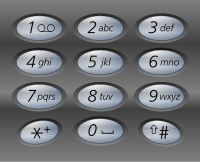

In [ ]:
class Solution:
    digit2letters={
        '2': "abc",
        '3': "def",
        '4': "ghi",
        '5': "jkl",
        '6': "mno",
        '7': "pqrs",
        '8': "tuv",
        '9': "wxyz"        
    }
    def letter_combinations(self, digits):
        result =[]
        self.dfs(digits, '', result)
        return result
    
    def dfs(self,digits, current, result):
        if not digits:
            result.append(current)
            return
        for letter in self.digit2letters[digits[0]]:
            self.dfs(digits[1:], current+letter, result)
if __name__ =="__main__":
    print(Solution().letter_combinations('89'))
"""
Given an array S of n integers, are there elements a, b, c, and d in S such that 
a + b + c + d = target? Find all unique
quadruplets in the array which gives the sum of target.
Note:
Elements in a quadruplet (a,b,c,d) must be in non-descending order. (ie, a <= b <= c <= d)
The solution set must not contain duplicate quadruplets.
    For example, given array S = {1 0 -1 0 -2 2}, and target = 0.

    A solution set is:
    (-1,  0, 0, 1)
    (-2, -1, 1, 2)
    (-2,  0, 0, 2)

"""
class Solution:
    def four_sum(self, nums, target):
        """
        大概是两个两个计算的
        Algorithm: Hash Table
        O(n^2)
        """
        length, result_set, sum2index =len(nums), set(), {}
        if length<4:
            return []
        nums.sort()
        
        for p in range(length):
            for q in range(p+1, length):
                # record the pair sum
                if nums[p] +nums[q] not in sum2index:
                    sum2index[nums[p]+nums[q]] =[(p,q)]
                else:
                    sum2index[nums[p]+nums[q]].append((p,q))
        for i in range(length):
            for j in range(i+1, length-2):
                sum_remain =target- nums[i]- nums[j]
                if sum_remain in sum2index:
                    for pair in sum2index[sum_remain]:
                        if pair[0] >j:
                            result_set.add((nums[i], nums[j], nums[pair[0]], nums[pair[1]]))
        return [list(i) for i in result_set] #convert tuple into list
if __name__=="__main__":
    print(Solution().four_sum([1,0,-1,0,-2,2], 0))               
                
"""
Given a linked list, remove the nth node from the end of list and return its head.

For example,

   Given linked list: 1->2->3->4->5, and n = 2.

   After removing the second node from the end, the linked list becomes 1->2->3->5.
Note:
Given n will always be valid.
Try to do this in one pass.
"""
class ListNode:
    def __init__(self, x):
        self.val =x
        self.next =None
class Solution:
    def remove_nth_from_end(self, head,n):
        """
        O(n)+O(n)
        :param head: head node
        :param n: the nth node from the end
        :return: ListNode, head node
        这个还是正向遍历之后，去除第len-n个元素。我的想法是 放入到list中，然后输出arr[-n]，
        实际上还是 O(n）
        """
           
        #head empty node named dummpy
        dummy = ListNode(0)
        dummy.next =head
        length =0     
        while head:
            length +=1
            head =head.next
            
        pre =dummy
        count =0
        while pre.next:
            cur =pre.next
            if count ==length -n:
                pre.next =cur.next
                break
            else:
                count += 1
                pre =pre.next
        return dummy.next
if __name__=="__main__":
    node1 =ListNode(1)
    node2 =ListNode(2)
    node3 =ListNode(3)
    node4 =ListNode(4)
    node5 =ListNode(5)
    node1.next =node2
    node2.next =node3
    node3.next =node4
    node4.next =node5
    bnode =Solution().remove_nth_from_end(node1, 2)
    print(bnode.val)

"""
Given a string containing just the characters '(', ')', '{', '}', '[' and ']', determine if the input 
string is valid.
The brackets must close in the correct order, "()" and "()[]{}" are all valid but "(]" and "([)]" are not.
"""

class Solution:
    def is_valid(self, s):
        put_set =('(','[','{')
        pop_set =(')',']','}')
        pair =dict(zip(put_set, pop_set))
        # a stack storing only pop_set
        stack =[]        
        for element in s:
            if element in put_set:
                stack.append(pair[element])
            elif element in pop_set:
                if not stack or element != stack.pop():
                    return False
        return True if not stack else False
if __name__ =="__main__":
    assert Solution().is_valid('()[]{}')
"""
Given n pairs of parentheses, write a function to generate all combinations of well-formed parentheses.

For example, given n = 3, a solution set is:

"((()))", "(()())", "(())()", "()(())", "()()()"
"""
class Solution:
    def generate_parenthesis(self,n):
        result =[]
        self.dfs(result, '', n,n)
        return result
    def dfs(self, result, cur, left, right):
        """
        left: number of left parenthesis remaining
        
        """
        # trivial
        if left ==0 and right ==0:
            result.append(cur)
            return
        if left >0:
            self.dfs(result, cur+'(', left-1, right)
        if right >left:
            self.dfs(result, cur+')', left, right-1)
if __name__ =="__main__":
    assert Solution().generate_parenthesis(3) ==['((()))', '(()())', '(())()', '()(())', '()()()']  
"""
Merge k sorted linked lists and return it as one sorted list. Analyze and describe its complexity.
"""

import heapq
class ListNode:
    def __init__(self, x):
        self.val =x
        self.next =None
class Solution:
    def merge_two_lists(self, l1, l2):
        """
        assuming ascending order
        """
        dummy =ListNode(0)
        dummy.next =l1
        
        pre =dummy
        the_other =l2
        while pre and pre.next:
            cur = pre.next
            if the_other and cur.val > the_other.val:
                #insert the_other into the cur(before)
                temp =the_other.next
                pre.next, the_other.next =the_other, cur
                the_other =temp
            pre =pre.next
        if the_other:
            pre.next =the_other
        return dummy.next
    
    def merge_k_lists(self, lists):
        heap =[]
        for head_node in lists:
            if head_node:
                heapq.heappush(heap, (head_node.val, head_node))
        dummy =ListNode(0)
        
        cur =dummy
        while heap:
            # return the current smallest value, [0]: node.val, [1]: node
            smallest_node =heapq.heappop(heap)[1]
            cur.next =smallest_node
            cur =cur.next
            if smallest_node.next:
                heapq.headpush(heap, (smallest_node.next.val, smallest_node.next))
        return dummy.next
if __name__=="__main__":
    node1 =ListNode(1)
    node2 =ListNode(3)
    node3 =ListNode(5)
    node4 =ListNode(7)
    node5 =ListNode(9)
    node1.next =node2
    node2.next =node3
    node3.next =node4
    node4.next =node5

    anode1 =ListNode(2)
    anode2 =ListNode(4)
    anode3 =ListNode(6)
    anode4 =ListNode(7)
    anode5 =ListNode(9)
    anode1.next =anode2
    anode2.next =anode3
    anode3.next =anode4
    anode4.next =anode5    
    assert Solution().merge_two_lists(node1,anode1).next.next.val ==3
    assert Solution().merge_k_lists([node1, anode1]).val ==0 

In [ ]:
"""
Given a linked list, swap every two adjacent nodes and return its head.

For example,Given 1->2->3->4, you should return the list as 2->1->4->3.
Your algorithm should use only constant space. You may not modify the values in the list,
only nodes itself can be
changed.
"""
class ListNode:
    def __init__(self, x):
        self.val =x
        self.next =None
class Solution:
    def swap_pairs(self, head):
        '''
        凡是涉及操作 node.next这种指针指向的，都貌似可以使用这种模板
        进行解答。 dummpy, head, pre, return dummpy
        reverse的方法就是维护三个指针
        '''
        dummy =ListNode(0)
        dummy.next =head
        
        pre =dummy
        while pre.next and pre.next.next:
            node1 =pre.next
            node2 =pre.next.next
            
            pre.next, node1.next, node2.next=node2,node2.next,node1
            
            pre =pre.next.next
        return dummy.next
    
if __name__=='__main__':
    node1 =ListNode(1)
    node2 =ListNode(3)
    node3 =ListNode(5)
    node4 =ListNode(7)

    node1.next =node2
    node2.next =node3
    node3.next =node4
    print(Solution().swap_pairs(node1).val)
"""
Given a linked list, reverse the nodes of a linked list k at a time and return its modified list.
If the number of nodes is not a multiple of k then left-out nodes in the end should remain as it is.
You may not alter the values in the nodes, only nodes itself may be changed.
Only constant memory is allowed.
For example,
Given this linked list: 1->2->3->4->5
For k = 2, you should return: 2->1->4->3->5
For k = 3, you should return: 3->2->1->4->5
reverse的方法就是维护三个指针
"""
class ListNode:
    def __init__(self, x):
        self.val =x
        self.next =None
class Solution:
    def reverse_k_group(self, head, k):
        
        dummy =ListNode(0)
        dummy.next =head
        
        pre =dummy
        cur_list =self.generate_list(pre.next, k)
        while pre and not None in cur_list:
            temp =cur_list[-1].next
            pre.next =cur_list[-1]
            for i in reversed(range(k)):
                if i ==0:
                    cur_list[i].next =temp
                else:
                    cur_list[i].next=cur_list[i-1]
            pre =cur_list[0]
            cur_list =self.generate_list(pre.next, k)
        return dummy.next                  

    def generate_list(self, head, k):
        lst =[]
        cur =head
        for i in range(k):
            if cur:
                lst.append(cur)
                cur =cur.next
            else:
                lst.append(None)
        return lst
if __name__=="__main__":
    node1 =ListNode(1)
    node2 =ListNode(3)
    node3 =ListNode(5)
    node4 =ListNode(7)
    node5 =ListNode(9)
    node6 =ListNode(11)

    node1.next =node2
    node2.next =node3
    node3.next =node4
    node4.next =node5
    node5.next =node6
    print(Solution().reverse_k_group(node1,2).next.next.next.next.val)

"""
Given an array and a value, remove all instances of that value in place and return the new length.
The order of elements can be changed. It doesn't matter what you leave beyond the new length.
"""
class Solution:
    def remove_element(self, alist,elem):
        left =0
        length =len(alist)
        
        while left <length:
            if alist[left] ==elem:
                length -=1
                alist[left], alist[length] =alist[length], alist[left]
            else:
                left += 1
        return length
if __name__=='__main__':
    alist =[1,3,4,2,5,4]
    elem =4
    print(Solution().remove_element(alist, elem))
    
"""
Given a sorted array, remove the duplicates in place such that each element appear only once 
and return the new length.
Do not allocate extra space for another array, you must do this in place with constant memory.
For example,
Given input array A = [1,1,2]
Your function should return length = 2, and A is now [1,2].
这种去重策略类型的题目，大多是使用两个指针。所以使用“两种指针”作为一种重要的思考方向，是值得重视的。
"""
class Solution:
    def remove_duplicates(self, nums):
        if not nums:
            return 0
        length =len(nums)
        
        for ind, val in enumerate(nums):
            if ind <len(nums)-2 and val ==nums[ind+1]:
                length -=1
        if nums[-1] ==nums[-2]:
            length -=1
        return length
if __name__=="__main__":
    nums =[1,1,2,2,3,4,5,56,56,89]
    print(Solution().remove_duplicates(nums))


"""
Divide two integers without using multiplication, division and mod operator.
"""
MAX_INT = 2147483647
MIN_INT =-2147483648
class Solution:
    def divide(self, divident,divisor):
        """
        O(nlgn)
        """
        if divisor ==0 or divident ==0:
            return 0
        if divident == MIN_INT and divisor ==-1:
            return MAX_INT
        # handle signs
        sign =1 if divident*divisor >=0 else -1
        divident =abs(divident)
        divisor =abs(divisor)
        
        result =0
        while divident >= divisor:
            current_result =1
            current =divisor
            while currrent <= divident:
                current <<=1
                current_result <<=1
            divident -= current>>1
            result += current_result>>1
        return sign*result
    
if __name__ =="__main__":
    assert Solution().divide(5, -1) ==-5
"""
Implement strStr().
Returns a pointer to the first occurrence of needle in haystack, or null 
if needle is not part of haystack 干草堆.实现 strStr() 函数。该函数用于判断一个字符串 needle 是否是另一个字符串
haystack 的子串。如果是，则该函数返回 needle 在 haystack 中首次出现的地址；
"""
class Solution:
    def strStr(self, haystack, needle):
        for i in range(len(haystack)- len(needle)+1):
            if haystack[i:i+len(needle)] ==needle:
                return i
        return None
if __name__ =="__main__":
    needle = "ABCDABD"
    haystack = "ABC ABCDAB ABCDABCDABDE"
    needle = "aaa"
    haystack = " aaa"
    print(Solution().strStr(haystack, needle))
"""
You are given a string, S, and a list of words, L, that are all of the same length. Find all starting indices 
of substring(s) in S that is a concatenation of each word in L exactly once and
without any intervening characters.
输入一个字符串s和一连串的长度相同的字符串数组words，找出仅由所有的words组成的s的子字符串起始位置。
For example, given:
S: "barfoothefoobarman"
L: ["foo", "bar"]
You should return the indices: [0,9].
(order does not matter).
"""
"""
that i and j are continuous guarantee the substring are continuous
"""
class Solution:
    def find_substring(self, S,L):
        words ={}
        word_count =len(L)
        for i in L:
            if i not in words:
                words[i] =1
            else:
                words[i] +=1
        word_len= len(L[0])
        result =[]        
        for i in range(len(S) +1- word_count*word_len):
            curr ={}
            j =0
            while j<word_count:
                word =S[i+j*word_len:i+j*word_len+word_len]
                if word not in words:
                    break
                if word not in curr:
                    curr[word] =1
                else:
                    curr[word] +=1
                if curr[word] >words[word]: 
                    break
                j+=1
            if j ==word_count:
                result.append(i)
        return result

if __name__=="__main__":    
    assert Solution().find_substring("abababab", ["a","b","a"])==[0,2,4]
    assert Solution().find_substring("a", ["a"])==[0]
    assert Solution().find_substring("lingmindraboofooowingdingbarrwingmonkeypoundcake",
                                     ["fooo","barr","wing","ding","wing"])==[13]
    assert Solution().find_substring("barfoofoofoobarman", ["foo", "foo"])==[3, 6]
"""
Implement next permutation, which rearranges numbers into the lexicographically next greater permutation of 
numbers. If such arrangement is not possible, it must rearrange it as the lowest possible order 
(ie, sorted in ascending order).
The replacement must be in-place, do not allocate extra memory.
Here are some examples. Inputs are in the left-hand column and its corresponding outputs are in the 
right-hand column.
1,2,3 -> 1,3,2
3,2,1 -> 1,2,3
1,1,5 -> 1,5,1

比如123生成的全排列是：123，132，213，231，312，321。那么321的next permutation是123。下面这种算法据说是STL中的经典算法。
在当前序列中，从尾端往前寻找两个相邻升序元素，升序元素对中的前一个标记为partition。然后再从尾端寻找另一个大于partition的元素，
并与partition指向的元素交换，然后将partition后的元素（不包括partition指向的元素）逆序排列。比如14532，那么升序对为45，
partition指向4，由于partition之后除了5没有比4大的数，所以45交换为54，即15432，然后将partition之后的元素逆序排列，
即432排列为234，则最后输出的next permutation为15234。确实很巧妙。
"""
class Solution:
    def next_permutation(self, num):
        length =len(num)
        partition_num_index =0
        change_num_index =0
        for i in reversed(range(1, length)):
            if num[i] >num[i-1]:
                partition_num_index =i-1
                break
        for i in reversed(range(1, length)):
            if num[i] >num[partition_num_index]:
                change_num_index =i
                break
        num[partition_num_index], num[change_num_index] =num[change_num_index], num[partition_num_index]
        if partition_num_index == change_num_index ==0:
            num.reverse()
        else:
            num[partition_num_index+1:] =reversed(num[partition_num_index+1:])
        return num
if __name__=="__main__":
    print(Solution().next_permutation([3,2,1]))
    print(Solution().next_permutation([2,3,1]))                 
"""
Given a string containing just the characters '(' and ')', find the length of the longest valid (well-formed)
parentheses substring.
For "(()", the longest valid parentheses substring is "()", which has length = 2.
Another example is ")()())", where the longest valid parentheses substring is "()()", which has length = 4.
想要O(n)的解法需要一点技巧，栈中保存的不是‘(’而是‘(’所在的index，在此基础上也要弄清楚几种情况：
每次来了‘(’之后，无条件压栈。如果碰到')'的话，如果栈不为空，就消除栈内剩余的'('
第一：消除掉'('之后，如果栈内还有剩余的‘(’的话，最长的合法长度就是：maxLength = Math.max(i - (int)stack.peek() ,
maxLength);  也就是取：当前')'的index减去栈顶元素的index  和 原来max_length 两者的最大值。
例如：对于这种情况：()(()()，可以正确的得出最大值为4。
第二：消除掉')'之后，栈内没有剩余的‘(’了。此时需要引入一个新的变量start，用于表示合法括号字符串的起点。
例如：对于这种情况：())()()，可以正确的得出最大值为4。
"""
class Solution:
    def longest_valid_parentheses(self, s):
        stack =[]
        maxa =0
        for idx, val in enumerate(s):
            if val ==')' and stack and s[stack[-1]] =="(":
                stack.pop()
                if not stack:
                    maxa =max(maxa, idx+1)
                else:
                    maxa =max(maxa, idx -stack[-1])
            else:
                stack.append(idx)
        return maxa
if __name__ =='__main__':
    assert Solution().longest_valid_parentheses("(()()") == 4
    assert Solution().longest_valid_parentheses("()(()") ==2
    assert Solution().longest_valid_parentheses("(()") ==2
    assert Solution().longest_valid_parentheses(")()())") == 4           
"""
Given a sorted array of integers, find the starting and ending position of a given target value.
Your algorithm's runtime complexity must be in the order of O(log n).
If the target is not found in the array, return [-1, -1].
For example,
Given [5, 7, 7, 8, 8, 10] and target value 8,
return [3, 4].
""" 
class Solution:
    def search_range(self, A, target):
        # assuming the array is ascending
        result =[]
        length =len(A)
        
        start =0
        end =length
        
        # 下界 low-bound binary search        
        while start<end:
            mid = (start+end)//2
            if A[mid] < target: # NOTICE, less than 
                start =mid+1
            else:
                end =mid
        # length :[0, length)
        if start <length and A[start] ==target:
            result.append(start)
        else:
            return [-1,-1]
        # high-bound binary search
        start =start
        end =length
        while start<end:
            mid =(start+end)//2
            if A[mid] <= target: # NOTICE less or equal than
                start =mid +1
            else:
                end =mid
        result.append(start-1)
        return result  
if __name__=="__main__":
    print(Solution().search_range([5, 7, 7,7,7, 8, 8, 10],7))